#### Install the Python library nltk (Natural Language Toolkit)

In [1]:
# pip install nltk

In [2]:
# Import libraries
import re  # For regular expressions
import nltk  # For text functions
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For dataframes

# Import corpora and functions from NLTK
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg

# Download data for NLTK
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)

# Use Matplotlib style sheet
plt.style.use('ggplot')

#### Prepare data

In [3]:
austen = gutenberg.sents('austen-emma.txt') # can choose another author name from the available choices
rows_list = []
for row in austen:
    if row:
        innerStr = ' '.join([str(elem) for elem in row]) #convert the list to single string
        rows_list.append([innerStr])

df = pd.DataFrame(rows_list, columns= ['text'])
df.head()

,text
0,[ Emma by Jane Austen 1816 ]
1,VOLUME I
2,CHAPTER I
3,"Emma Woodhouse , handsome , clever , and rich ..."
4,She was the youngest of the two daughters of a...


- Tokenize data; convert to lowercase; omit extra spaces

In [4]:
def clean_text(text):
    text = text.lower()  # Convert all text to lowercase
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)  # Leave only word characters
    text = re.sub(r'\s+', ' ', text)  # Omit extra space characters
    text = text.strip()
    return text

df['text'] = df['text'].map(clean_text) 
df['text'] = df['text'].map(word_tokenize) # Split text into word tokens

df.head()

,text
0,"[emma, by, jane, austen, 1816]"
1,"[volume, i]"
2,"[chapter, i]"
3,"[emma, woodhouse, handsome, clever, and, rich,..."
4,"[she, was, the, youngest, of, the, two, daught..."


#### Collect tokens into a single series

In [5]:
df = df.text.explode().to_frame('token')
df.head(10)

,token
0,emma
0,by
0,jane
0,austen
0,1816
1,volume
1,i
2,chapter
2,i
3,emma


#### Sort tokens by frequency

In [6]:
df.token.value_counts().head(10)

to     5239
the    5201
and    4896
of     4291
i      3178
a      3129
it     2528
her    2469
was    2398
she    2340
Name: token, dtype: int64

#### Remove stop words

In [7]:
stopwords = set(stopwords.words('english')) # load stopwords

df = df[~df.token.isin(stopwords)]

#### Revised tokens sorted by frequency

In [8]:
df.token.value_counts().head(10)

mr         1153
emma        865
could       837
would       820
mrs         699
miss        599
must        567
harriet     506
much        486
said        484
Name: token, dtype: int64

#### Identify words with the "Opinion" lexicon

In [9]:
sentiment_lexicon = {
    **{w: 'positive' for w in opinion_lexicon.positive()},
    **{w: 'negative' for w in opinion_lexicon.negative()}
}

df['sentiment'] = df['token'].map(sentiment_lexicon)
df = df[~df.sentiment.isna()] # drop words which are not in opinion lexicon

df.head(10)

,token,sentiment
3,handsome,positive
3,clever,positive
3,rich,positive
3,comfortable,positive
3,happy,positive
3,best,positive
3,distress,negative
3,vex,negative
4,affectionate,positive
4,indulgent,positive


#### Sort sentiment words by frequency

In [10]:
df.token.value_counts().head(10)

miss      599
well      401
good      358
great     264
like      200
better    173
poor      136
enough    129
happy     125
love      117
Name: token, dtype: int64

#### Summarize

In [11]:
summary_df = df.sentiment.value_counts().to_frame('n')
summary_df['prop'] = summary_df['n'] / summary_df.n.sum()

summary_df.round(3)

,n,prop
positive,7157,0.598
negative,4812,0.402


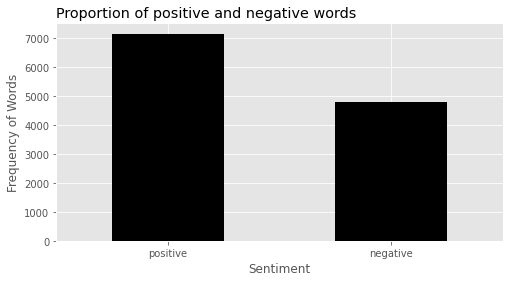

In [15]:
summary_df.n.plot.bar(legend=False, figsize=(8, 4), grid=True, color='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency of Words')
plt.title('Proportion of positive and negative words', loc='left')
plt.xticks(rotation=0);